In [ ]:
%pip install prophet

In [2]:
#importamos todas las librerías necesarias
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

In [3]:
#guardamos los datos en un dataframe
data = pd.read_excel('ruta')
data

,Fecha,ultimo,apertura,maximo,minimo,Vol.,% var.
0,29.08.2023,4497.63,4432.75,4500.14,4431.68,NaN,0.0145
1,28.08.2023,4433.31,4426.03,4439.56,4414.98,NaN,0.0063
2,25.08.2023,4405.71,4389.38,4418.46,4356.29,NaN,0.0067
3,24.08.2023,4376.31,4455.16,4458.30,4375.55,NaN,-0.0135
4,23.08.2023,4436.01,4396.44,4443.18,4396.44,NaN,0.0110
...,...,...,...,...,...,...,...
4671,07.02.2005,1201.70,1203.00,1204.20,1199.30,NaN,-0.0011
4672,04.02.2005,1203.00,1189.90,1203.50,1189.70,NaN,0.0110
4673,03.02.2005,1189.90,1193.20,1193.20,1185.60,NaN,-0.0028
4674,02.02.2005,1193.20,1189.40,1195.20,1188.90,NaN,0.0032


In [3]:
data.dtypes

Fecha        object
ultimo      float64
apertura    float64
maximo      float64
minimo      float64
Vol.        float64
% var.      float64
dtype: object

In [4]:
data['Fecha'] = pd.to_datetime(data['Fecha'], dayfirst=True)
data.head()

,Fecha,ultimo,apertura,maximo,minimo,Vol.,% var.
0,2023-08-29,4497.63,4432.75,4500.14,4431.68,NaN,0.0145
1,2023-08-28,4433.31,4426.03,4439.56,4414.98,NaN,0.0063
2,2023-08-25,4405.71,4389.38,4418.46,4356.29,NaN,0.0067
3,2023-08-24,4376.31,4455.16,4458.30,4375.55,NaN,-0.0135
4,2023-08-23,4436.01,4396.44,4443.18,4396.44,NaN,0.0110


In [31]:
data.dtypes

Fecha       datetime64[ns]
ultimo             float64
apertura           float64
maximo             float64
minimo             float64
Vol.               float64
% var.             float64
dtype: object

In [5]:
new_column_names = {'Fecha':'ds'} #se debe cambiar el nombre de la columna y posteriormente el de la columna que se quiere predecir ya que así los entiende prophet
data.rename(columns=new_column_names, inplace=True)

df = data.copy() #copiamos la base de datos para tomar de la copia los datos que ingresarán al modelo y los de la base de datos original serán con los que compararemos

new_column_names = {'ultimo':'y'}
df.rename(columns=new_column_names, inplace=True)

df = df.loc[df['ds'] < '2023-01-01']
df #filtramos los datos que queremos ingresar al modelo

,ds,y,apertura,maximo,minimo,Vol.,% var.
165,2022-12-30,3839.50,3829.06,3839.85,3800.34,NaN,-0.0025
166,2022-12-29,3849.28,3805.45,3858.19,3805.45,NaN,0.0175
167,2022-12-28,3783.22,3829.56,3848.32,3780.78,NaN,-0.0120
168,2022-12-27,3829.25,3843.34,3846.65,3813.22,NaN,-0.0040
169,2022-12-23,3844.82,3815.11,3845.80,3797.01,NaN,0.0059
...,...,...,...,...,...,...,...
4671,2005-02-07,1201.70,1203.00,1204.20,1199.30,NaN,-0.0011
4672,2005-02-04,1203.00,1189.90,1203.50,1189.70,NaN,0.0110
4673,2005-02-03,1189.90,1193.20,1193.20,1185.60,NaN,-0.0028
4674,2005-02-02,1193.20,1189.40,1195.20,1188.90,NaN,0.0032


In [6]:
#se entrena el modelo
modelo = Prophet()
modelo.fit(df)

#se crean las fechas sobre las que se harán las predicciones
future = modelo.make_future_dataframe(periods=365)

forecast = modelo.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


11:15:59 - cmdstanpy - INFO - Chain [1] start processing
11:16:01 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
4871,2023-12-26,4981.896968,4719.859106,5244.402091
4872,2023-12-27,4985.491847,4742.453828,5244.497663
4873,2023-12-28,4989.722058,4728.035123,5239.300655
4874,2023-12-29,4993.026394,4752.732635,5261.292715
4875,2023-12-30,5026.795603,4792.566484,5285.176044


In [ ]:

modelo_cv = cross_validation(model= modelo, initial = '365.25 days', horizon = '30 days', parallel = 'processes')
modelo_cv.head()

In [8]:
model_performance = performance_metrics(modelo_cv,rolling_window=1)
model_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,30 days,50395.70087,224.489868,139.195204,0.058778,0.042007,0.058523,0.332705


In [23]:
#se modifican algunos hiperparametros para mejorar las predicciones 
tuning_model = Prophet(changepoint_range = 0.9, changepoint_prior_scale= 2,n_changepoints=100,seasonality_prior_scale=2)
tuning_model.fit(df)


13:22:17 - cmdstanpy - INFO - Chain [1] start processing
13:22:30 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future_tuning = tuning_model.make_future_dataframe(periods=365)
future_tuning.tail()

,ds
4871,2023-12-26
4872,2023-12-27
4873,2023-12-28
4874,2023-12-29
4875,2023-12-30


In [25]:
forecast_tuning = tuning_model.predict(future_tuning)
forecast_tuning[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4871,2023-12-26,3799.341747,2554.716032,5083.577413
4872,2023-12-27,3799.971386,2495.661278,5097.078850
4873,2023-12-28,3799.995171,2503.567519,5126.568919
4874,2023-12-29,3800.114169,2524.330272,5115.343453
4875,2023-12-30,3769.119765,2486.898900,5061.602430


In [ ]:
tuning_model_cv = cross_validation(tuning_model,initial='365.25 days',period = '7 days', horizon='30 days',parallel = 'processes')
model_performance = performance_metrics(tuning_model_cv,rolling_window=1)
model_performance.head()

In [28]:
datos_2023_noprobados = data[data['ds'] > '2023-01-01']

# Combinar los datos reales filtrados con las predicciones
total_datos_2023= pd.merge(datos_2023_noprobados, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
total_datos_2023.head()

,ds,ultimo,apertura,maximo,minimo,Vol.,% var.,yhat,yhat_lower,yhat_upper
0,2023-08-29,4497.63,4432.75,4500.14,4431.68,NaN,0.0145,4834.829514,4610.597890,5065.690837
1,2023-08-28,4433.31,4426.03,4439.56,4414.98,NaN,0.0063,4833.632747,4605.634669,5070.518333
2,2023-08-25,4405.71,4389.38,4418.46,4356.29,NaN,0.0067,4830.330752,4599.975780,5077.447289
3,2023-08-24,4376.31,4455.16,4458.30,4375.55,NaN,-0.0135,4830.846024,4608.041349,5060.098038
4,2023-08-23,4436.01,4396.44,4443.18,4396.44,NaN,0.0110,4830.369823,4588.320923,5064.328997


In [29]:
datos_2023_noprob_tuning = data[data['ds'] > '2023-01-01']

# Combinar los datos reales filtrados con las predicciones
total_datos_2023_tuning= pd.merge(datos_2023_noprob_tuning, forecast_tuning[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
total_datos_2023_tuning

,ds,ultimo,apertura,maximo,minimo,Vol.,% var.,yhat,yhat_lower,yhat_upper
0,2023-08-29,4497.63,4432.75,4500.14,4431.68,NaN,0.0145,3809.366528,3070.944009,4521.151612
1,2023-08-28,4433.31,4426.03,4439.56,4414.98,NaN,0.0063,3808.891039,3092.928329,4522.052825
2,2023-08-25,4405.71,4389.38,4418.46,4356.29,NaN,0.0067,3808.535898,3114.700134,4524.485400
3,2023-08-24,4376.31,4455.16,4458.30,4375.55,NaN,-0.0135,3808.762277,3137.045242,4520.107115
4,2023-08-23,4436.01,4396.44,4443.18,4396.44,NaN,0.0110,3809.080906,3126.792904,4521.775545
...,...,...,...,...,...,...,...,...,...,...
160,2023-01-09,3892.09,3910.82,3950.57,3890.42,NaN,-0.0008,4058.516491,3942.838284,4162.391869
161,2023-01-06,3895.08,3823.37,3906.19,3809.56,NaN,0.0228,4062.987974,3944.819157,4177.960179
162,2023-01-05,3808.10,3839.74,3839.74,3802.42,NaN,-0.0116,4064.176436,3943.043489,4177.223119
163,2023-01-04,3852.97,3840.36,3873.16,3815.77,NaN,0.0075,4065.166708,3944.996001,4175.889351


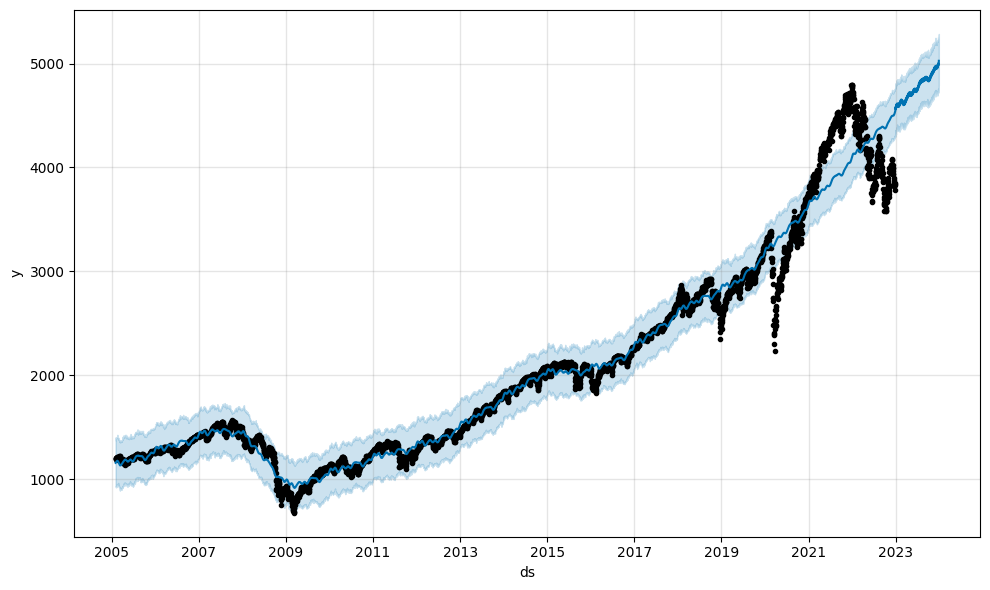

In [30]:
modelo_vs_prediccion = modelo.plot(forecast)

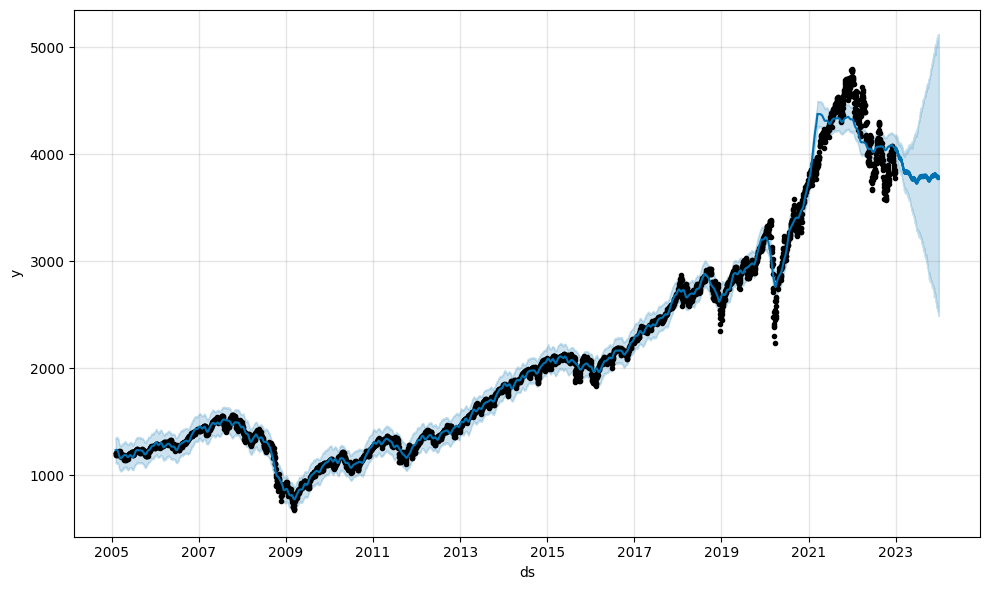

In [31]:
modelo_vs_prediccion_tuning = tuning_model.plot(forecast_tuning)

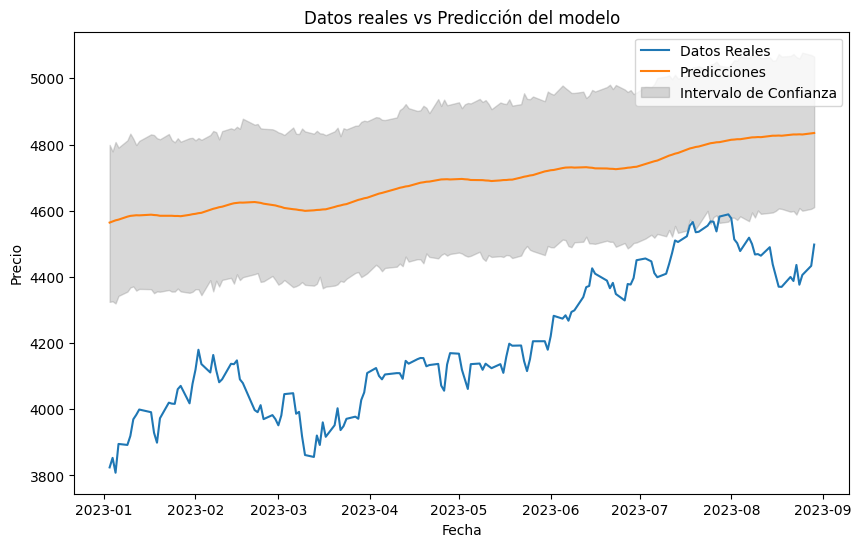

In [32]:
# Crear la gráfica
total_datos_2023 = total_datos_2023.sort_values(by = 'ds')
plt.figure(figsize=(10, 6))
plt.plot(total_datos_2023['ds'], total_datos_2023['ultimo'], label='Datos Reales')
plt.plot(total_datos_2023['ds'], total_datos_2023['yhat'], label='Predicciones')
plt.fill_between(total_datos_2023['ds'], total_datos_2023['yhat_lower'], total_datos_2023['yhat_upper'], color='gray', alpha=0.3, label='Intervalo de Confianza')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Datos reales vs Predicción del modelo')
plt.legend()
plt.show()

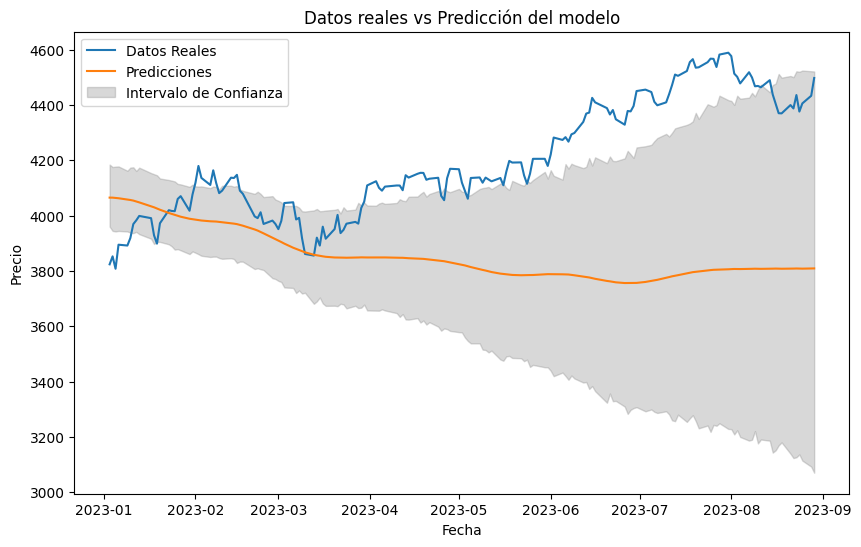

In [33]:
# Crear la gráfica del modelo con hipermarámetros modificados manualmente
total_datos_2023_tuning = total_datos_2023_tuning.sort_values(by = 'ds')
plt.figure(figsize=(10, 6))
plt.plot(total_datos_2023_tuning['ds'], total_datos_2023_tuning['ultimo'], label='Datos Reales')
plt.plot(total_datos_2023_tuning['ds'], total_datos_2023_tuning['yhat'], label='Predicciones')
plt.fill_between(total_datos_2023_tuning['ds'], total_datos_2023_tuning['yhat_lower'], total_datos_2023_tuning['yhat_upper'], color='gray', alpha=0.3, label='Intervalo de Confianza')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Datos reales vs Predicción del modelo')
plt.legend()
plt.show()